In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from os import listdir
from numpy import asarray

folder = '/content/drive/MyDrive/nhandienhoa/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('apricot'):
    output = 0
  if file.startswith('daisy'):
    output = 1
  if file.startswith('lotus'):
    output = 2
  if file.startswith('rose'):
    output = 3
  if file.startswith('waterlily'):
    output = 4
  
  photo = load_img(folder + file, target_size=(224,224))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/nhandienhoa/Flowers_photos.npy', photos)
save('/content/drive/MyDrive/nhandienhoa/Flowers_labels.npy', labels)

(50, 224, 224, 3) (50,)


In [4]:
import numpy as np

# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/nhandienhoa/Flowers_photos.npy')
labels = np.load('/content/drive/MyDrive/nhandienhoa/Flowers_labels.npy')
labels_one_hot = to_categorical(labels)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [5]:
#Build model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import ReLU
from keras.optimizers import Adam
from keras.optimizers import RMSprop

classes = 5

model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape= (224,224, 3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 128)       1

In [6]:
#Tăng cường data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")


In [7]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(aug.flow(x_train, y_train, batch_size=32),
                               epochs = 50)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)


Epoch 1/50
2/2 [==============================] - 14s 2s/step - loss: 1.6463 - accuracy: 0.2286
Epoch 2/50
2/2 [==============================] - 12s 1s/step - loss: 1.6303 - accuracy: 0.3143
Epoch 3/50
2/2 [==============================] - 10s 8s/step - loss: 1.6086 - accuracy: 0.1714
Epoch 4/50
2/2 [==============================] - 11s 1s/step - loss: 1.6086 - accuracy: 0.2286
Epoch 5/50
2/2 [==============================] - 12s 2s/step - loss: 1.6064 - accuracy: 0.2571
Epoch 6/50
2/2 [==============================] - 11s 2s/step - loss: 1.6065 - accuracy: 0.3143
Epoch 7/50
2/2 [==============================] - 11s 1s/step - loss: 1.6094 - accuracy: 0.2571
Epoch 8/50
2/2 [==============================] - 12s 1s/step - loss: 1.6061 - accuracy: 0.2571
Epoch 9/50
2/2 [==============================] - 12s 10s/step - loss: 1.6141 - accuracy: 0.1429
Epoch 10/50
2/2 [==============================] - 12s 1s/step - loss: 1.6080 - accuracy: 0.1714
Epoch 11/50
2/2 [=====================

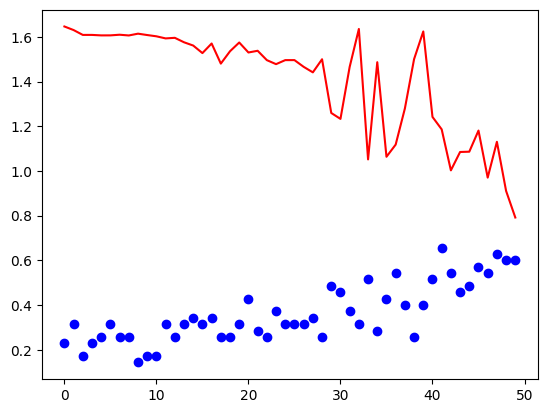

In [8]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()


In [10]:
train = model.fit(aug.flow(x_train, y_train, batch_size=32),
                               epochs = 30)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/30
2/2 [==============================] - 11s 2s/step - loss: 0.9471 - accuracy: 0.5714
Epoch 2/30
2/2 [==============================] - 11s 8s/step - loss: 0.6632 - accuracy: 0.6571
Epoch 3/30
2/2 [==============================] - 12s 10s/step - loss: 0.8501 - accuracy: 0.6000
Epoch 4/30
2/2 [==============================] - 12s 1s/step - loss: 0.9655 - accuracy: 0.6571
Epoch 5/30
2/2 [==============================] - 12s 1s/step - loss: 0.9387 - accuracy: 0.5714
Epoch 6/30
2/2 [==============================] - 12s 10s/step - loss: 0.8131 - accuracy: 0.6571
Epoch 7/30
2/2 [==============================] - 10s 8s/step - loss: 1.2353 - accuracy: 0.5143
Epoch 8/30
2/2 [==============================] - 13s 1s/step - loss: 0.8098 - accuracy: 0.6571
Epoch 9/30
2/2 [==============================] - 12s 10s/step - loss: 0.8820 - accuracy: 0.6286
Epoch 10/30
2/2 [==============================] - 10s 8s/step - loss: 0.7366 - accuracy: 0.8286
Epoch 11/30
2/2 [===================

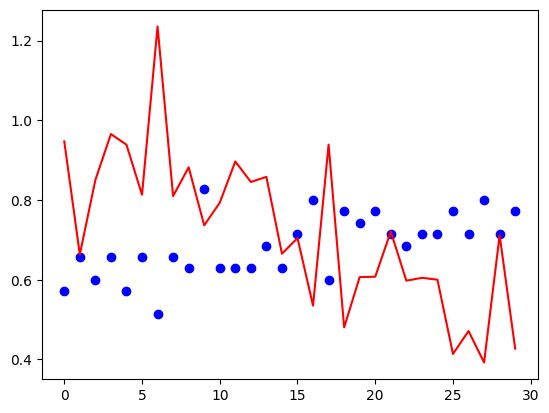

In [11]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [13]:
train = model.fit(aug.flow(x_train, y_train, batch_size=32),
                               epochs = 10)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/10
2/2 [==============================] - 14s 2s/step - loss: 0.5438 - accuracy: 0.8571
Epoch 2/10
2/2 [==============================] - 12s 9s/step - loss: 0.4502 - accuracy: 0.8571
Epoch 3/10
2/2 [==============================] - 12s 1s/step - loss: 0.5151 - accuracy: 0.7429
Epoch 4/10
2/2 [==============================] - 10s 8s/step - loss: 0.4864 - accuracy: 0.8286
Epoch 5/10
2/2 [==============================] - 12s 1s/step - loss: 0.5324 - accuracy: 0.7143
Epoch 6/10
2/2 [==============================] - 10s 8s/step - loss: 0.3215 - accuracy: 0.8286
Epoch 7/10
2/2 [==============================] - 12s 8s/step - loss: 0.5382 - accuracy: 0.8000
Epoch 8/10
2/2 [==============================] - 12s 1s/step - loss: 0.4951 - accuracy: 0.7429
Epoch 9/10
2/2 [==============================] - 12s 10s/step - loss: 0.2167 - accuracy: 0.8857
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 1151.7943 - accuracy: 0.4000
Accurency: 0.4000000059604645
Loss: 

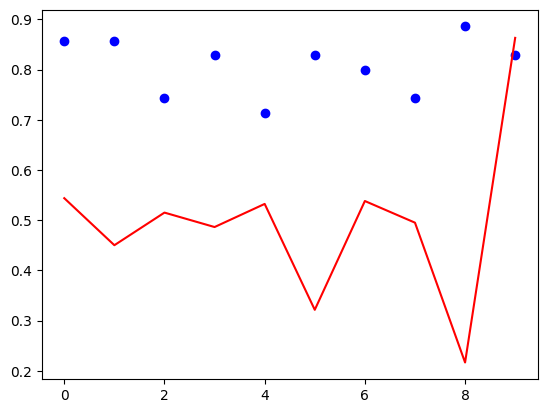

In [14]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [15]:
model.save('/content/drive/MyDrive/nhandienhoa/Flower.h5')

In [16]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/nhandienhoa/Flower.h5')

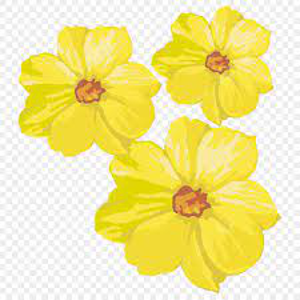

1/1 [==============================] - 0s 251ms/step
['apricot']


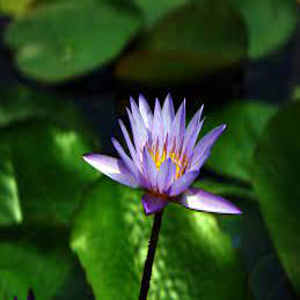

1/1 [==============================] - 0s 101ms/step
['waterlity']


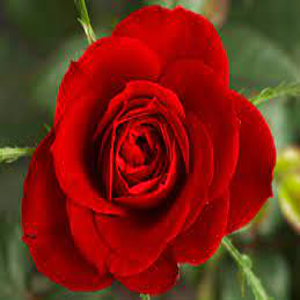

1/1 [==============================] - 0s 98ms/step
['apricot']


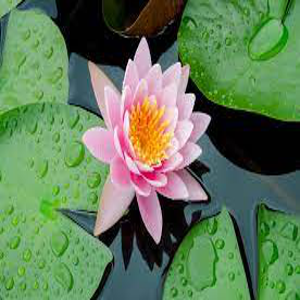

1/1 [==============================] - 0s 179ms/step
['waterlity']


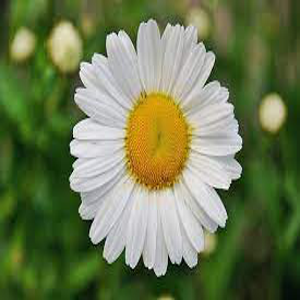

1/1 [==============================] - 0s 340ms/step
['daisy']


In [24]:
from PIL import Image
import numpy as np
import os

#Tạo mảng để chứa label
label = np.array(['apricot', 'daisy', 'lotus', 'rose', 'waterlity'])


# Kích thước mới của ảnh
new_size = (300, 300)
predict_size = (224, 224)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/nhandienhoa/checking data flowers'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,224,224,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])